# Computing Maximum Drawdown

In this lab, we'll develop the code to compute the maximum drawdown of a return series, and we'll start to develop our own module which will act as a toolkit that we will add to during the course.

First, let's read the return series we processed in the previous lab:


<Axes: >

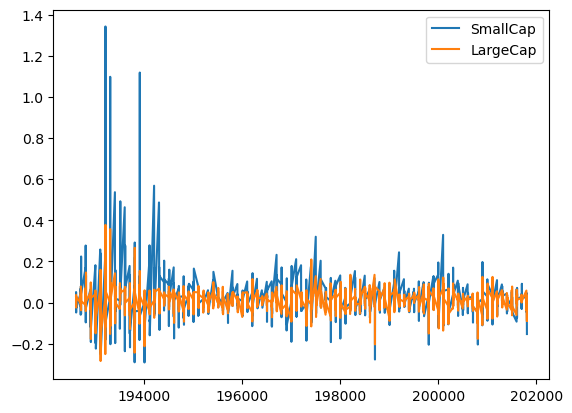

In [2]:
import pandas as pd

me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

## Timeseries - forcing the index to be a datetime

We asked Pandas to `parse_dates` in `read_csv()`. Let's check if it was able to do so with the index:

In [28]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

The `dtype` is `int64` which suggests that it was not automatically converted to a date time index, so let's do that now manually. The simplest way to force it to be a timeseries is by reformatting the index data to a `datetime` type as follows:

In [48]:
#rets.index = pd.to_datetime(rets.index, format="%Y%m")
#rets.index

In [37]:
rets1=rets.to_timestamp()
rets1

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270
...,...,...
2018-08-01,0.0241,0.0234
2018-09-01,-0.0168,0.0087
2018-10-01,-0.1002,-0.0657
2018-11-01,-0.0365,0.0253


Now that the DataFrame has a datetime index, we can treat the entire dataframe as a timeseries, which makes things very convenient. For instance, we can extract just the returns in 2008 as follows:

In [47]:
#rets1.resample('M')

In [46]:
#serie_con_fechas.index = pd.to_datetime(serie_con_fechas.index)

In [35]:
rets.loc["2008"]

,SmallCap,LargeCap
2008-01,-0.0436,-0.0490
2008-02,-0.0203,-0.0250
2008-03,-0.0440,-0.0122
2008-04,0.0027,0.0492
2008-05,0.0286,0.0161
2008-06,-0.0816,-0.1015
2008-07,-0.0079,-0.0140
2008-08,0.0110,0.0087
2008-09,-0.1274,-0.1155
2008-10,-0.2041,-0.1763


This looks good except that we know this is monthly data, and it's showing up with an index that is date stamped. We can fix this using the `to_period` method. We'll see several more examples of Pandas support for timeseries during the course.

In [45]:
#rets.index = rets.index.to_period('M')
#rets.head()

In [44]:
#rets.PeriodIndex(year=[2000, 2001], month=[1,2], freq="M") # monthly

In [43]:
rets.asfreq('M')

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
...,...,...
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253


In [49]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [50]:
rets.describe()

,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

<Axes: >

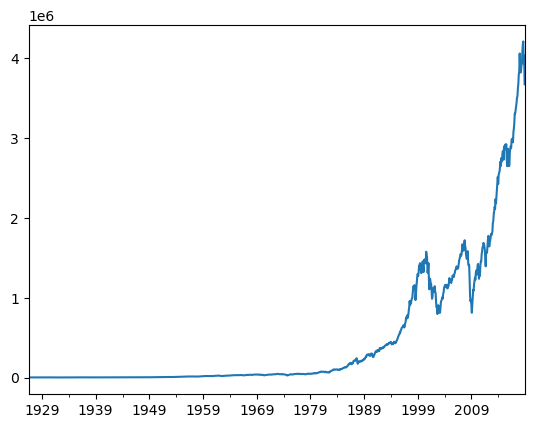

In [54]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
# compute the growth of a dolar over time by the compounding effect of each of the returns
#cummultavive product
wealth_index.plot()

In [55]:
wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: LargeCap, Length: 1110, dtype: float64

<Axes: >

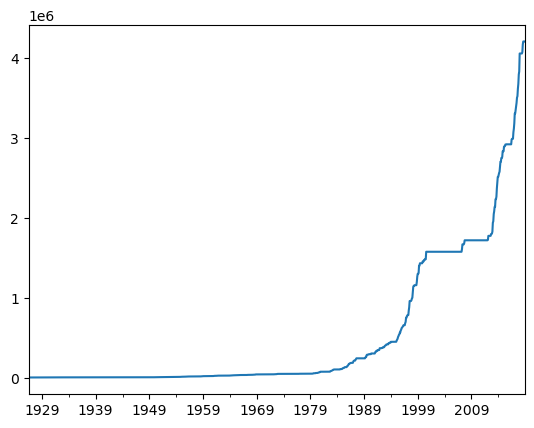

In [57]:
previous_peaks = wealth_index.cummax()
# cummulative maximum
previous_peaks.plot()
# when we reach a maximum it goes flat

<Axes: >

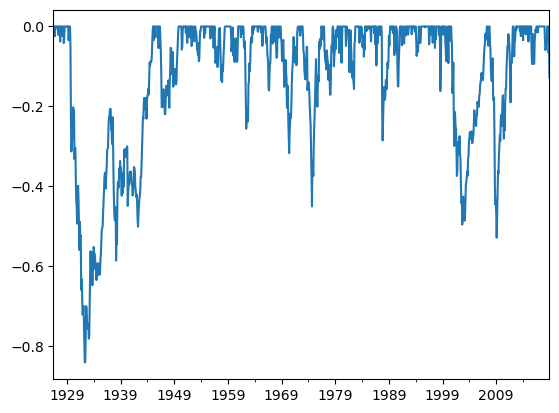

In [58]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [60]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [59]:
drawdown.min()

-0.8400375277943123

<Axes: >

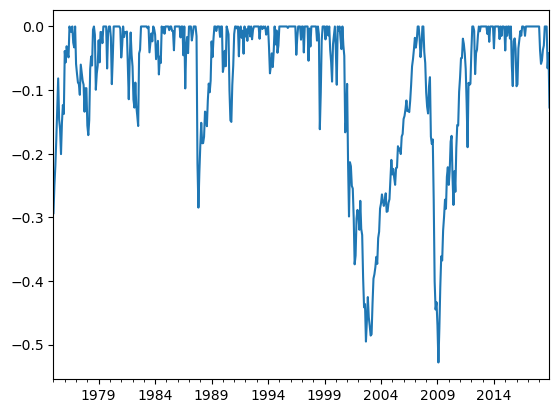

In [61]:
drawdown["1975":].plot() # vamos a estudiar las drawdown desde 1975

In [64]:
drawdown["1975":].idxmin() #le pedimos la fecha donde se registró el minimo

Period('2009-02', 'M')

In [62]:
drawdown["1975":].min() 

-0.5280945042309304

# Creating a Drawdown Function

Redoing this analysis for SmallCap would be tedious, since we would need to re-enter all these commands at the prompt. Instead, let's create our first function that will form the first tool in our financial toolkit.

The function will take as input, a timeseries of returns, and return a timeseries as a DataFrame that contains the wealth index, the previous peaks and the drawdowns as a percent.

In [67]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

drawdown(rets["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [71]:
drawdown(rets["LargeCap"])[["Wealth", "Previous Peak"]].head()

,Wealth,Previous Peak
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<Axes: >

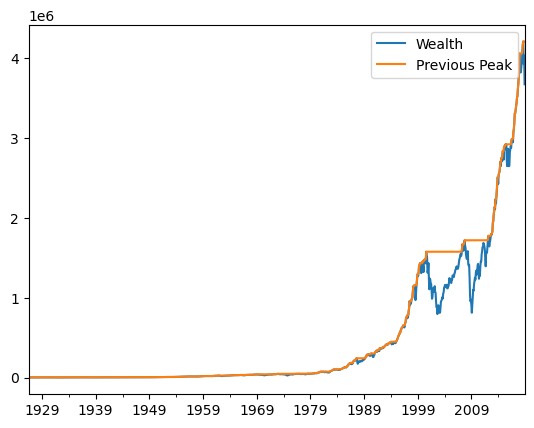

In [72]:
drawdown(rets["LargeCap"])[["Wealth", "Previous Peak"]].plot()

<Axes: >

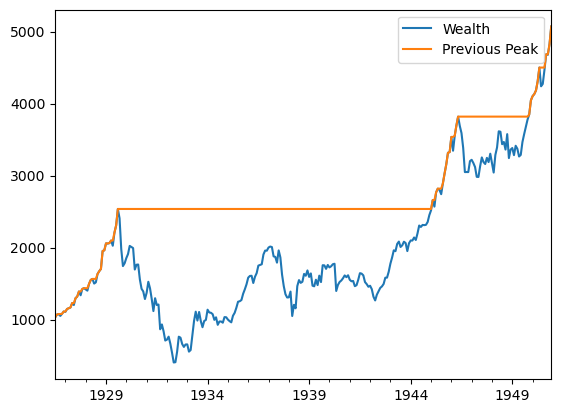

In [73]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth", "Previous Peak"]].plot()

In [75]:
drawdown(rets["LargeCap"])[["Drawdown"]].min()

Drawdown   -0.840038
dtype: float64

In [76]:
drawdown(rets["LargeCap"]).min()

Wealth            405.769102
Previous Peak    1032.900000
Drawdown           -0.840038
dtype: float64

In [16]:
drawdown(rets["SmallCap"]).min()

Wealth           491.240323
Previous Peak    985.500000
Drawdown          -0.833001
dtype: float64

In [77]:
drawdown(rets["SmallCap"])[["Drawdown"]].min()

Drawdown   -0.833001
dtype: float64

In [19]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

Buscamos cuando se dio la caída en las large y samll cap para ver
si mas o menos fue en las mismas fevhas y se debe a alguna crisis

In [78]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [ ]:
Si fue en las mismas, ahora queremos saber 

In [82]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [83]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [81]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].min()

-0.6312068077252386